In [1]:
from cutting_plane import solve_problem
from helpers import plot_intervals, swiss_nsf
from generate_intervals import generate_uniform_intervals, generate_fixedwidth_intervals

import matplotlib.pyplot as plt

# Example 1

In [2]:
x = [16, 15, 14.5, 12, 10.75, 10.5, 8.2, 7.5, 6.5, 5.5]
w = 1 
I = [(y-w, y+w) for y in x]

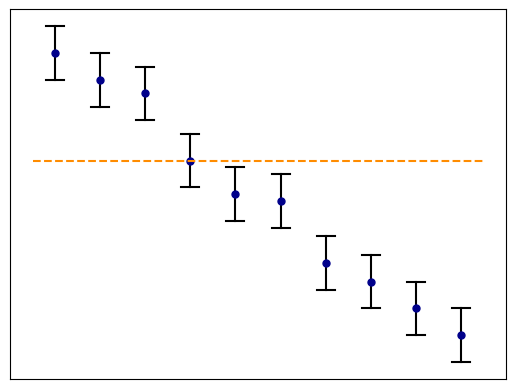

In [3]:
ax = plot_intervals(I, x=x, k=4, plot_swiss_nsf=True, show_axes=False)

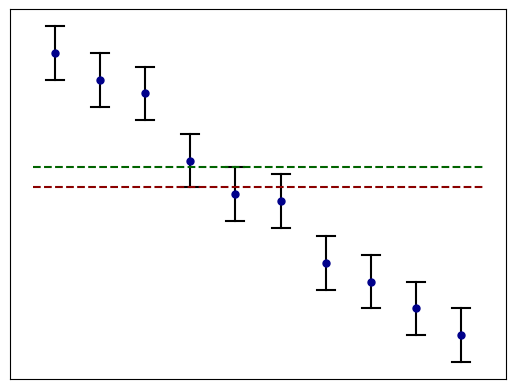

In [4]:
ax = plot_intervals(I, x=x, k=4, plot_algo=True, show_axes=False)

In [5]:
solve_problem(I, 4)

(array([1.        , 1.        , 1.        , 0.33333333, 0.33333333,
        0.33333333, 0.        , 0.        , 0.        , 0.        ]),
 3.3333333333333335,
 {'iterations': 1,
  'convergence': True,
  'total_cuts': 0,
  'n_vars': 1,
  'n_chains': 1,
  'n_mono_constraints': 0,
  'timing': {'symmetry_setup': 4.100799560546875e-05,
   'monotonicity_constraints_setup': 3.0994415283203125e-05,
   'optimization_loop_time': 6.175041198730469e-05,
   'total_time': 0.04002499580383301,
   'init_prune_time': 8.177757263183594e-05}})

In [6]:
swiss_nsf(I, x, 4)

[1, 1, 1, 1.0, 0, 0, 0, 0, 0, 0]

# Example 2

In [7]:
I = [
 (8, 9.3),
 (5.4, 8.5),
 (5.3, 7.5),
 (4.7, 6.3),
 (3,6),
 (2, 6),
 (0., 4.8),
 (0, 2),
 (0, 1.5),
 (0, 1)
]

x = [(i[1] + i[0])/2. for i in I]

In [8]:
# sort intervals by LCB 
I = sorted(I, key=lambda interval: interval[0], reverse=True)
x = [(interval[1] + interval[0]) / 2. for interval in I]

<Axes: >

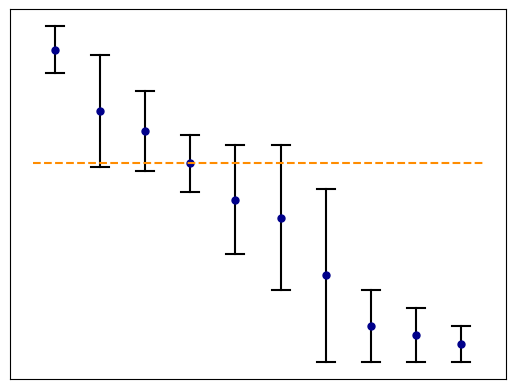

In [9]:
plot_intervals(I, x=x, k=4, plot_swiss_nsf=True, show_axes=False)

In [10]:
solve_problem(I, 4)

(array([1.  , 0.75, 0.75, 0.5 , 0.5 , 0.5 , 0.  , 0.  , 0.  , 0.  ]),
 2.5,
 {'iterations': 2,
  'convergence': True,
  'total_cuts': 3,
  'n_vars': 3,
  'n_chains': 1,
  'n_mono_constraints': 2,
  'timing': {'symmetry_setup': 4.792213439941406e-05,
   'monotonicity_constraints_setup': 0.00010323524475097656,
   'optimization_loop_time': 5.0067901611328125e-05,
   'total_time': 0.0051038265228271484,
   'init_prune_time': 3.3855438232421875e-05}})

## Monotonicity Example

In [2]:
I = [
    (9, 10),
    (5, 9.7),
    (4,8),
    (4, 8)
]

x = [(i[1] + i[0])/2. for i in I]

<Axes: >

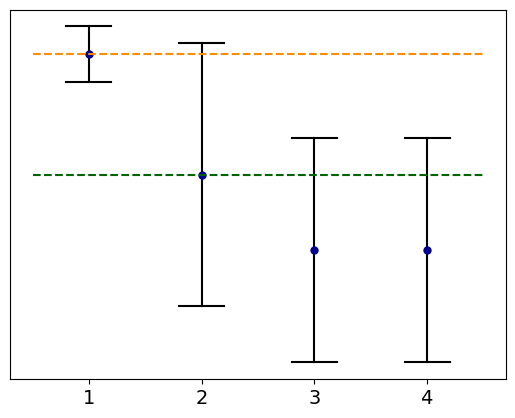

In [3]:
plot_intervals(I, x=x, k=[1,2], plot_swiss_nsf=True, show_axes=True, hide_y=True)

### Check Reversal Symmetry

In [2]:
def flip_intervals(I, M = 1.):
    I_f = I.copy()
    for i in range(len(I)):
        I_f[i] = (M - I[i][1], M - I[i][0])
    # reverse ordering of intervals
    return I_f

In [3]:
I = generate_fixedwidth_intervals(20, 1, M = 10.)
# sort intervals by LCB
I = sorted(I, key=lambda interval: interval[0], reverse=True)
x = [(interval[1] + interval[0]) / 2. for interval in I]

I_f = flip_intervals(I)
x_f = [(interval[1] + interval[0]) / 2. for interval in I_f]

In [4]:
p, v, info = solve_problem(I, 5)
p_F, v_F, info_F = solve_problem(I_f, 5)

In [5]:
p_swiss = swiss_nsf(I, x, 5)
p_swiss_F = swiss_nsf(I_f, x_f, 5)

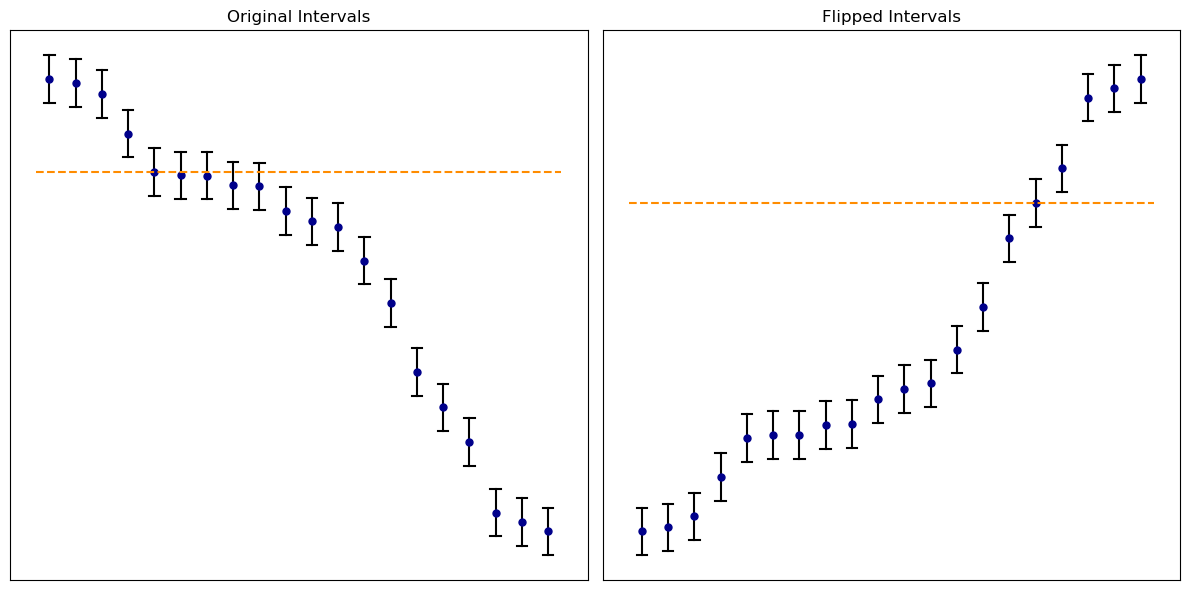

In [6]:
# show ax0 and ax1 side by side
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
plot_intervals(I, x=x, k=5, plot_swiss_nsf=True, ax=ax0, show_axes=False)
plot_intervals(I_f, x=x_f, k=5, plot_swiss_nsf=True, ax=ax1, show_axes=False)

ax0.set_title("Original Intervals")
ax1.set_title("Flipped Intervals")

plt.tight_layout()
plt.show()


In [9]:
n = 20
k = 8

I_algo = None
I_swiss = None
for iter in range(5000):
    if I_algo is not None and I_swiss is not None:
        break

    I = generate_fixedwidth_intervals(n, 1, M = 10.)
    # sort intervals by LCB
    I = sorted(I, key=lambda interval: interval[0], reverse=True)
    x = [(interval[1] + interval[0]) / 2. for interval in I]

    I_f = flip_intervals(I)
    x_f = [(interval[1] + interval[0]) / 2. for interval in I_f]

    p, v, info = solve_problem(I, k)
    p_F, v_F, info_F = solve_problem(I_f, k)

    p_swiss = swiss_nsf(I, x, k)
    p_swiss_F = swiss_nsf(I_f, x_f, k) 

    indices1 = [i for i, j in enumerate(p) if j == 1]
    for i in indices1:
        if p_F[i] > 0:
            print("Found a counterexample for our algo.")
            I_algo = I.copy()
            break
    
    indices1 = [i for i, j in enumerate(p_swiss) if j == 1]
    for i in indices1:
        if p_swiss_F[i] > 0:
            print("Found a counterexample for Swiss NSF algo.")
            I_swiss = I.copy()
            break

In [20]:
I_swiss

[(0.45874, 0.5249),
 (0.44691, 0.69109),
 (0.43975, 0.88285),
 (0.42881, 0.51804),
 (0.39305, 0.49278),
 (0.3422, 0.81855),
 (0.30068, 0.75953),
 (0.16167, 0.41618),
 (0.16116, 0.22078),
 (0.00489, 0.0064)]

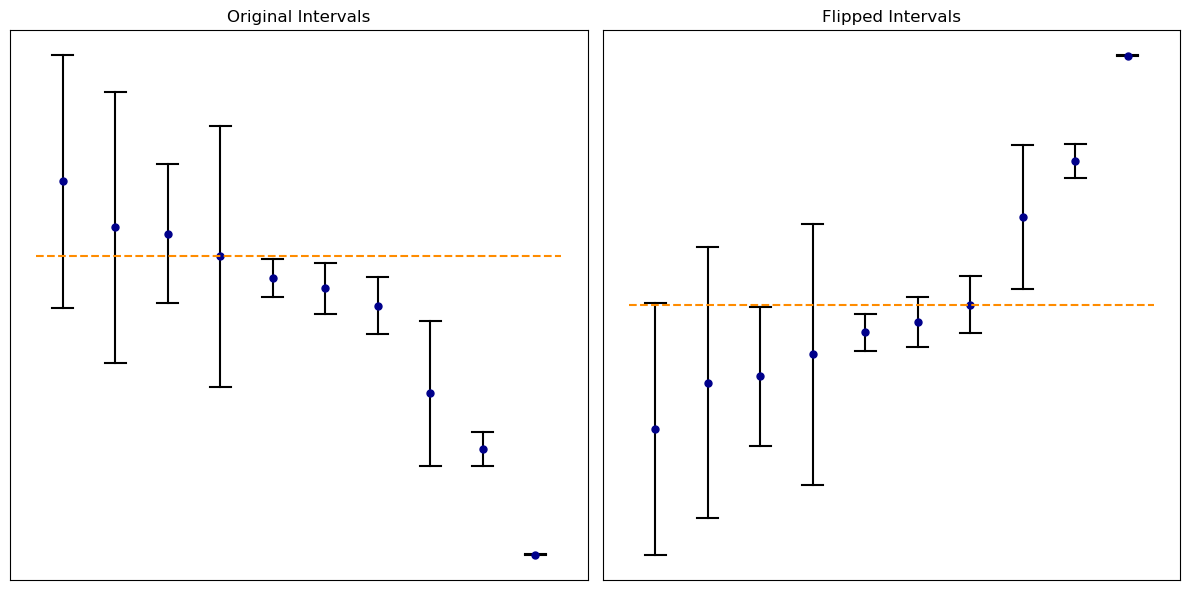

In [27]:
x_swiss = [(interval[1] + interval[0]) / 2. for interval in I_swiss]
# sort swiss intervals by x_swiss
I_swiss = sorted(I_swiss, key=lambda interval: (interval[1] + interval[0]) / 2., reverse=True)
x_swiss = sorted(x_swiss, reverse=True)

I_f = flip_intervals(I_swiss)
x_f = [(interval[1] + interval[0]) / 2. for interval in I_f]

# show ax0 and ax1 side by side
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
plot_intervals(I_swiss, x=x_swiss, k=4, plot_swiss_nsf=True, ax=ax0, show_axes=False)
plot_intervals(I_f, x=x_f, k=4, plot_swiss_nsf=True, ax=ax1, show_axes=False)

ax0.set_title("Original Intervals")
ax1.set_title("Flipped Intervals")

plt.tight_layout()
plt.show()

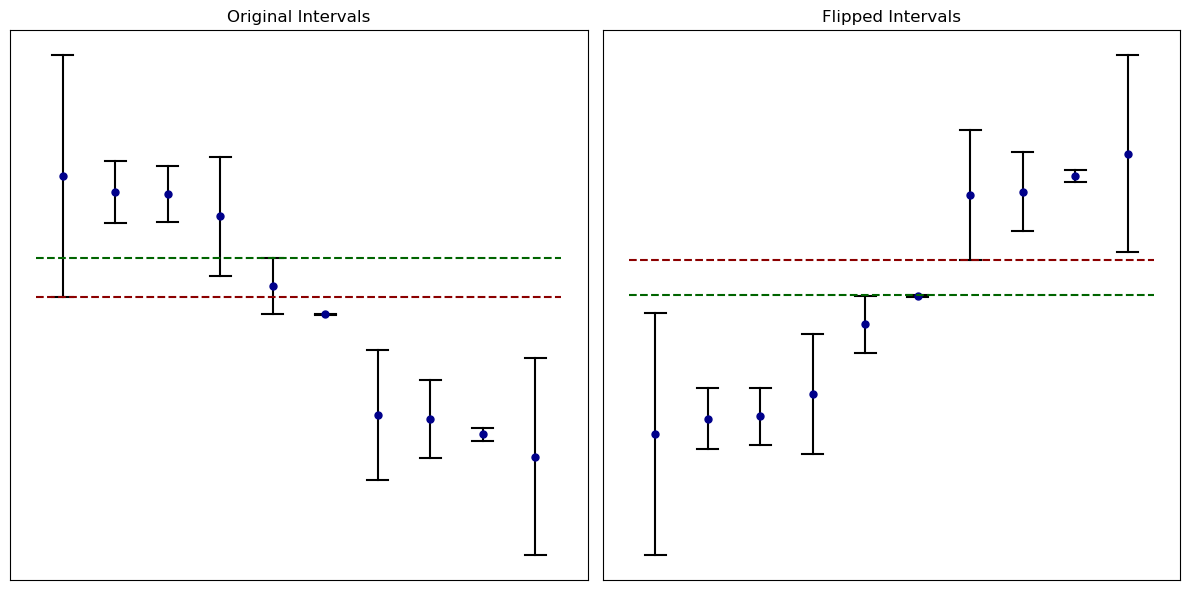

In [38]:
x_algo = [(interval[1] + interval[0]) / 2. for interval in I_algo]
# sort algo intervals by x_algo
I_algo = sorted(I_algo, key=lambda interval: (interval[1] + interval[0]) / 2., reverse=True)
x_algo = sorted(x_algo, reverse=True)

I_f = flip_intervals(I_algo)
x_f = [(interval[1] + interval[0]) / 2. for interval in I_f]

# show ax0 and ax1 side by side
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
plot_intervals(I_algo, x=x_algo, k=4, plot_algo=True, ax=ax0, show_axes=False)
plot_intervals(I_f, x=x_f, k=4, plot_algo=True, ax=ax1, show_axes=False)

ax0.set_title("Original Intervals")
ax1.set_title("Flipped Intervals")

plt.tight_layout()
plt.show()

In [39]:
solve_problem(I_algo, 4)

(array([0.66666667, 1.        , 1.        , 0.66666667, 0.66666667,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 3.333333333333333,
 {'iterations': 1,
  'convergence': True,
  'total_cuts': 0,
  'n_vars': 1,
  'n_chains': 1,
  'n_mono_constraints': 0,
  'timing': {'symmetry_setup': 3.2901763916015625e-05,
   'monotonicity_constraints_setup': 3.0040740966796875e-05,
   'optimization_loop_time': 4.1961669921875e-05,
   'total_time': 0.0037093162536621094,
   'init_prune_time': 2.6941299438476562e-05},
  'n_top': 2,
  'n_bottom': 5,
  'n_rand': 3})

In [40]:
solve_problem(I_f, 4)

([1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 4,
 {'iterations': 0,
  'convergence': True,
  'total_cuts': 0,
  'n_vars': 10,
  'n_chains': None,
  'n_mono_constraints': 0,
  'timing': {}})

In [41]:
I_f = flip_intervals(I_algo)

In [43]:
solve_problem(I_f, 4)

([1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 4,
 {'iterations': 0,
  'convergence': True,
  'total_cuts': 0,
  'n_vars': 10,
  'n_chains': None,
  'n_mono_constraints': 0,
  'timing': {}})

## Test Stability

In [26]:
import numpy as np

In [96]:
I = generate_uniform_intervals(10, M = 1.)
k = 3
# sort intervals by LCB
l1_max = 0 
l1_swiss_max = 0
worst_case = None
worst_case_swiss = None

ds = [k-1]
for d in ds:
    ps = []
    for _ in range(10000):
        I = sorted(I, key=lambda interval: interval[0], reverse=True)
        x = [(interval[1] + interval[0]) / 2. for interval in I]

        p,_,_ = solve_problem(I, k)
        p_swiss = swiss_nsf(I, x, k)

        I_new = I.copy()
        x_new = x.copy()
        # resample interval d 
        a = np.random.uniform(0, 1)
        b = np.random.uniform(0, 1)
        if a > b:
            a, b = b, a
        I_new[d] = (a, b)
        x_new[d] = (a + b) / 2.
        p_new,_,_ = solve_problem(I_new, k)
        p_swiss_new = swiss_nsf(I_new, x_new, k)

        # get L1 distances
        l1 = np.sum(np.abs(np.array(p) - np.array(p_new)))
        l1_swiss = np.sum(np.abs(np.array(p_swiss) - np.array(p_swiss_new)))

        if l1 > l1_max:
            l1_max = l1
            worst_case = (I, I_new)
        if l1_swiss > l1_swiss_max:
            worst_case_swiss = (I, I_new)
            l1_swiss_max = max(l1_swiss, l1_swiss_max)

In [97]:
l1_max

2.4

In [98]:
l1_swiss_max

2.666666666666667

In [147]:
I, I_new = worst_case

In [148]:
I

[(0.76568, 0.8771),
 (0.63932, 0.93888),
 (0.36032, 0.57196),
 (0.22962, 0.97341),
 (0.19393, 0.36241),
 (0.19252, 0.61779),
 (0.12727, 0.5714),
 (0.09233, 0.9525),
 (0.07193, 0.49736),
 (0.07026, 0.41017)]

In [149]:
I_new

[(0.76568, 0.8771),
 (0.63932, 0.93888),
 (0.8808321838033583, 0.9864269110821806),
 (0.22962, 0.97341),
 (0.19393, 0.36241),
 (0.19252, 0.61779),
 (0.12727, 0.5714),
 (0.09233, 0.9525),
 (0.07193, 0.49736),
 (0.07026, 0.41017)]

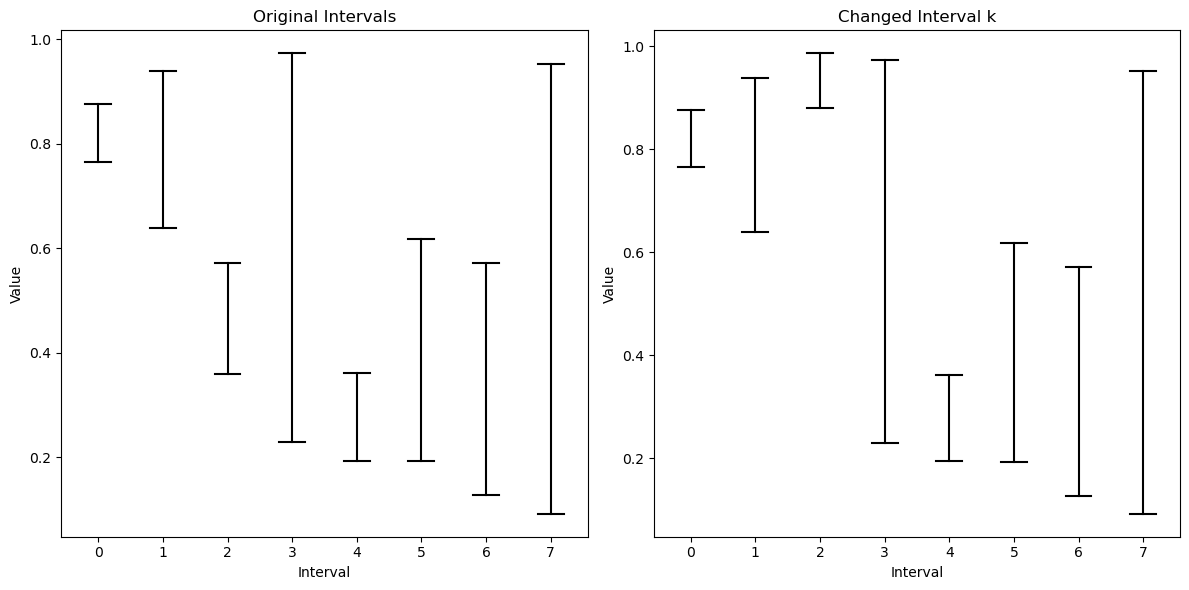

In [150]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

plot_intervals(I[:8], ax=ax0, show_axes=True)
plot_intervals(I_new[:8], ax=ax1, show_axes=True)

ax0.set_title("Original Intervals")
ax1.set_title("Changed Interval k")

plt.tight_layout()
plt.show()

In [154]:
from full_LP import get_constraints

get_constraints(I[:8])

[(0, 2), (0, 4), (0, 5), (0, 6), (1, 2), (1, 4), (1, 5), (1, 6)]

In [155]:
get_constraints(I_new[:8])

[(0, 4),
 (0, 5),
 (0, 6),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 0),
 (2, 4),
 (2, 5),
 (2, 6)]

In [121]:
I = I[:8]
I_new = I_new[:8]

In [122]:
p,_,_ = solve_problem(I[:8], k)

In [123]:
p_new,_,_ = solve_problem(I_new[:8], k)

In [124]:
p, p_new

(array([1. , 1. , 0. , 0.5, 0. , 0. , 0. , 0.5]),
 array([0.2, 0.6, 1. , 0.6, 0. , 0. , 0. , 0.6]))

In [49]:
n = 100 
k = 20
J = [(0,2) for _ in range(k)] + [(-0.5,0.6) for _ in range(n-k)]
x = [(j[1] + j[0]) / 2. for j in J]

In [55]:
p,_,_ = solve_problem(J, k)
p_swiss = swiss_nsf(J, x, k)

In [65]:
I = J.copy()
I[k-1] = (-10,-9)
x[k-1] = (-10-9)/2.

In [66]:
p_new,_,_ = solve_problem(I, k)
p_swiss_new = swiss_nsf(I, x, k)

In [68]:
# get L1 distances
l1 = np.sum(np.abs(np.array(p) - np.array(p_new)))
l1_swiss = np.sum(np.abs(np.array(p_swiss) - np.array(p_swiss_new)))

In [69]:
l1, l1_swiss

(0.3999999999999987, 32.32323232323232)

In [192]:
J = [
    (7,10),
    (7,8),
    (5,6),
    (1,10),
    (1,10)
]

J_d = J.copy()
J_d[2] = (9,10)

k = 3

In [193]:
p,_,_ = solve_problem(J[:5], k)

In [194]:
p_new,_,_ = solve_problem(J_d[:5], k)

In [195]:
p

array([1. , 1. , 0. , 0.5, 0.5])

In [196]:
p_new

array([0.6, 0.2, 1. , 0.6, 0.6])

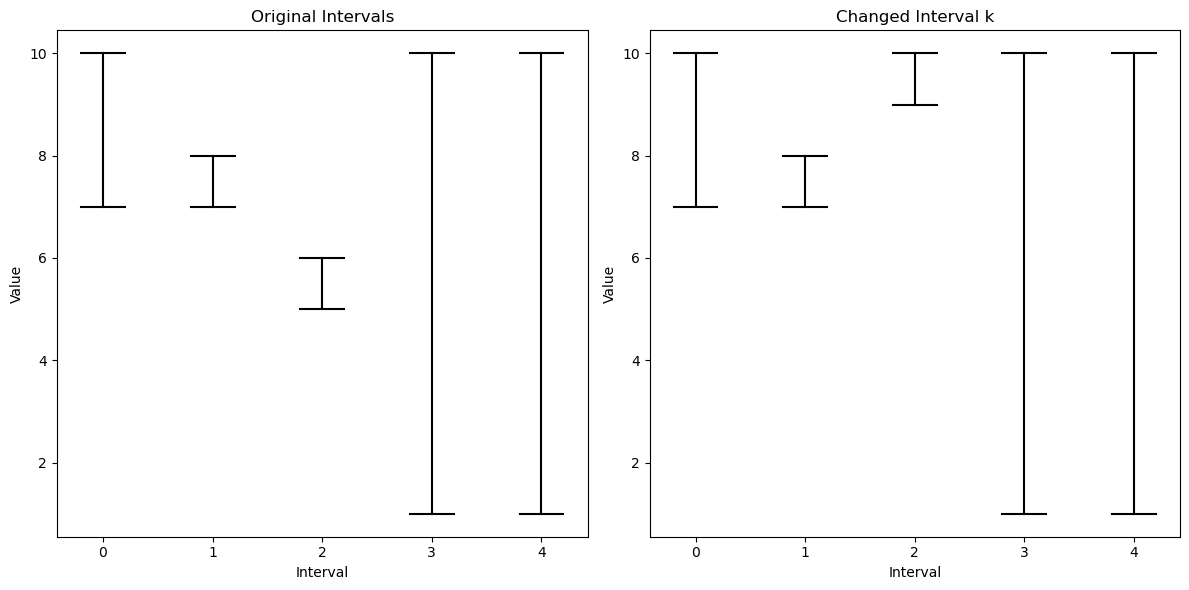

In [ ]:
# plot J and J_d
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
plot_intervals(J, ax=ax0, show_axes=True)
plot_intervals(J_d, ax=ax1, show_axes=True)
ax0.set_title("Original Intervals")
ax1.set_title("Changed Interval 2")
plt.tight_layout()
plt.show()

In [198]:
p, p_new

(array([1. , 1. , 0. , 0.5, 0.5]), array([0.6, 0.2, 1. , 0.6, 0.6]))

In [210]:
I = [(6,5), (4,3), (2,1)] + [(1,10)]*5

In [211]:
solve_problem(I, 3)

(array([0.85714286, 0.        , 0.        , 0.42857143, 0.42857143,
        0.42857143, 0.42857143, 0.42857143]),
 1.2857142857142856,
 {'iterations': 2,
  'convergence': True,
  'total_cuts': 2,
  'n_vars': 3,
  'n_chains': 2,
  'n_mono_constraints': 1,
  'timing': {'symmetry_setup': 3.814697265625e-05,
   'monotonicity_constraints_setup': 4.601478576660156e-05,
   'optimization_loop_time': 4.982948303222656e-05,
   'total_time': 0.010252714157104492,
   'init_prune_time': 2.4080276489257812e-05},
  'n_top': 0,
  'n_bottom': 1,
  'n_rand': 7})

<Axes: xlabel='Interval', ylabel='Value'>

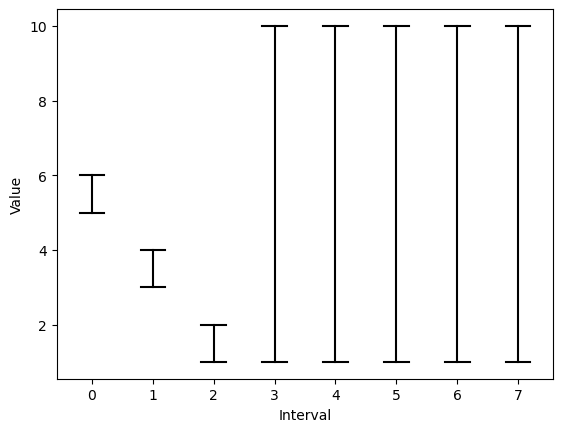

In [212]:
plot_intervals(I, k=k, show_axes=True)

In [219]:
I = [
    (9,10),
    (8,9.5),
    (7,9.5),
    (6,9.5),
    (5,8.5),
    (4,8.5),
]

In [220]:
solve_problem(I, 3)

(array([1.  , 0.5 , 0.5 , 0.5 , 0.25, 0.25]),
 1.5,
 {'iterations': 2,
  'convergence': True,
  'total_cuts': 3,
  'n_vars': 3,
  'n_chains': 1,
  'n_mono_constraints': 2,
  'timing': {'symmetry_setup': 6.198883056640625e-05,
   'monotonicity_constraints_setup': 0.00020599365234375,
   'optimization_loop_time': 4.315376281738281e-05,
   'total_time': 0.0081329345703125,
   'init_prune_time': 2.2172927856445312e-05},
  'n_top': 0,
  'n_bottom': 0,
  'n_rand': 6})

In [42]:
I = generate_fixedwidth_intervals(10, 0.5)[::-1]

In [45]:
solve_problem(I, 4)

(array([1. , 1. , 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ]),
 3.0,
 {'iterations': 2,
  'convergence': True,
  'total_cuts': 2,
  'n_vars': 3,
  'n_chains': 1,
  'n_mono_constraints': 2,
  'timing': {'symmetry_setup': 4.291534423828125e-05,
   'monotonicity_constraints_setup': 5.2928924560546875e-05,
   'optimization_loop_time': 4.220008850097656e-05,
   'total_time': 0.005021333694458008,
   'init_prune_time': 2.6941299438476562e-05},
  'n_top': 2,
  'n_bottom': 4,
  'n_rand': 4})

In [46]:
solve_problem(flip_intervals(I), 4)

(array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1]),
 4,
 {'iterations': 0,
  'convergence': True,
  'total_cuts': 0,
  'n_vars': 10,
  'n_chains': None,
  'n_mono_constraints': 0,
  'timing': {}})